<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/HW1/crack_the_code_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.

- **Question 2.** Compute the expected value $\mu$ of the distribution.

- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

$$p(x;a,20) = \begin{cases} \frac{1}{10} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{1}{10} \frac{20-x}{20-a} & \text{if } a < x \leq 20, \\ 0 & \text{otherwise.} \end{cases}$$

In [12]:
import numpy as np
import requests
import io

b = 20

url = 'https://raw.githubusercontent.com/Jerry0209/FundamentalLearningEPFL/main/HW1/fixed_b.npy'

try:
    response = requests.get(url)
    response.raise_for_status()

    data = np.load(io.BytesIO(response.content))
    print(f"Successfully loaded！")
    print(f"Data Shape: {data.shape}")

except Exception as e:
    print(f"Error：{e}")
    data = np.array([])

Successfully loaded！
Data Shape: (100,)


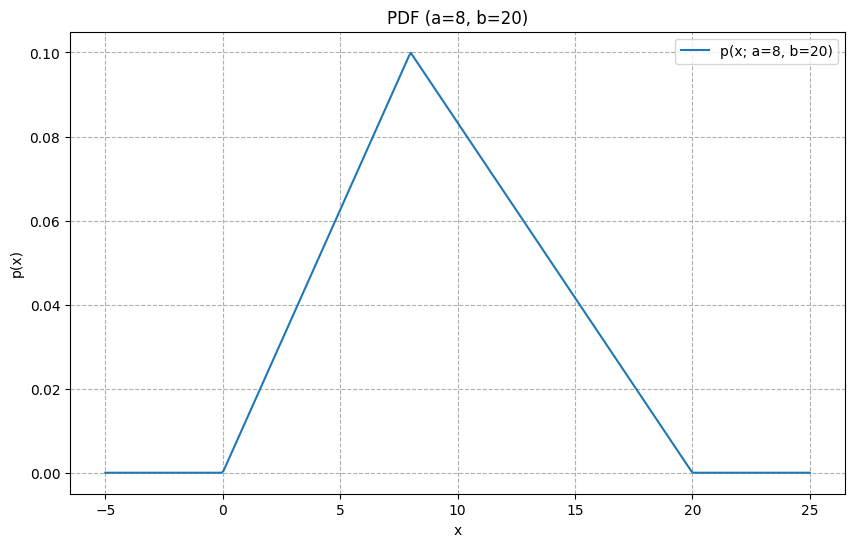

In [13]:
def pdf(x, a, b=b):

    if a <= 0 or a > b:
        # a must be in the range [0, b]
        if isinstance(x, np.ndarray):
            return np.zeros_like(x)
        else:
            return 0.0

    x = np.asarray(x)
    p = np.zeros_like(x, dtype=float)
    H = 2.0 / b

    # Case 1: 0 <= x <= a
    mask1 = (x >= 0) & (x <= a)
    if a > 0:
        p[mask1] = H * (x[mask1] / a)

    # Case 2: a < x <= b
    mask2 = (x > a) & (x <= b)
    if b - a > 0:
        p[mask2] = H * ((b - x[mask2]) / (b - a))
    elif a == b: # a=b
        #  Belongs to case 1
        pass

    return p

# --- Plot ---
a_test = 8 # Randomly choose

x_vals = np.linspace(-5, 25, 400)
y_vals = pdf(x_vals, a=a_test, b=b)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=f'p(x; a={a_test}, b={b})')
plt.title(f'PDF (a={a_test}, b={b})')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

Totally 100 data points in the file.


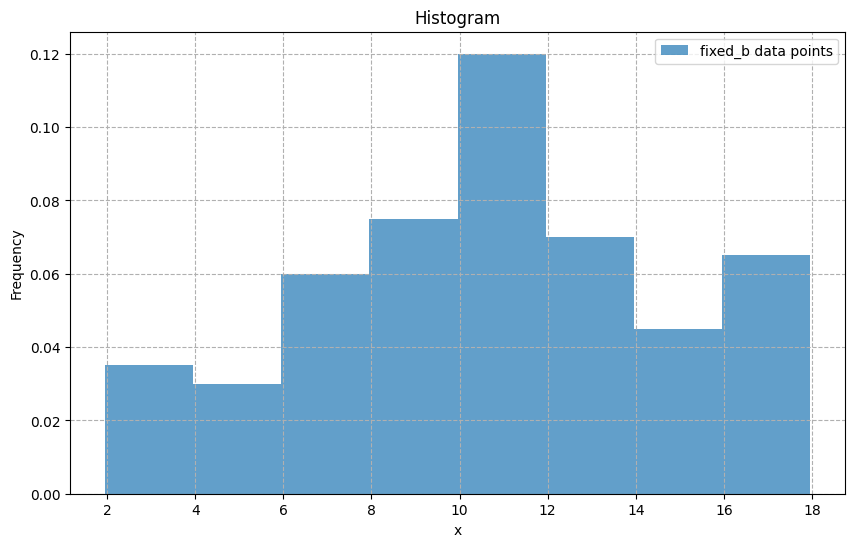

In [15]:
# Data points
n = len(data)
print(f"Totally {n} data points in the file.")

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins='auto', density=True, alpha=0.7, label='fixed_b data points')
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$.

In [16]:
x_bar = np.mean(data)
m_bar = np.median(data)

print(f"Empirical Mean (x_bar): {x_bar:.4f}")
print(f"Empirical Median (m_bar): {m_bar:.4f}")

Empirical Mean (x_bar): 10.7398
Empirical Median (m_bar): 10.7005


- **Question 9.** Use the expression of the expected value you computed above to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

In [7]:
def est_a_mean(x_bar, b=B_KNOWN):
    """
    使用经验均值估计 a。
    """
    return 3 * x_bar - b

def est_a_median(m_bar, b=B_KNOWN):
    """
    使用经验中位数估计 a。
    """
    if m_bar >= b / 2.0:
        return 2 * (m_bar**2) / b
    else:
        return b - 2 * ((b - m_bar)**2) / b

# 使用 Q8 中计算的值
a_hat_mean = est_a_mean(x_bar, b=B_KNOWN)
a_hat_median = est_a_median(m_bar, b=B_KNOWN)

print(f"基于均值的估计 (a_hat_mean):   {a_hat_mean:.4f}")
print(f"基于中位数的估计 (a_hat_median): {a_hat_median:.4f}")

基于均值的估计 (a_hat_mean):   12.2193
基于中位数的估计 (a_hat_median): 11.4501


 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1797204534.py:28: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(a_vals, ll_vals, label='$\mathcal{L}(a)$')
/tmp/ipython-input-1797204534.py:29: SyntaxWarning: invalid escape sequence '\m'
  plt.title('对数似然函数 $\mathcal{L}(a)$ (b=20)')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28982 (\N{CJK UNIFIED IDEOGRAPH

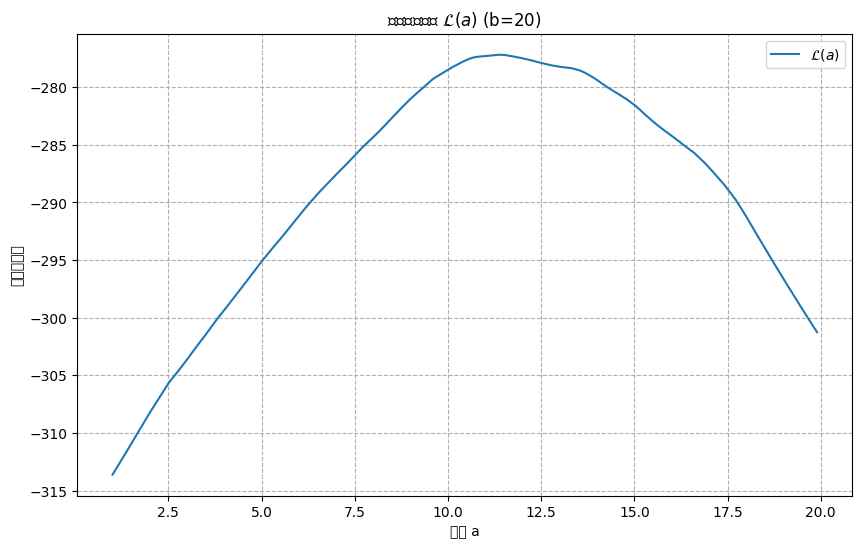

In [8]:
def log_likelihood(a, data, b=B_KNOWN):
    """
    计算给定 a 时，数据 data 的对数似然。
    """
    # 检查 a 的有效范围
    if a <= 0 or a >= b:
        return -np.inf

    # 计算所有数据点的 pdf
    p_vals = pdf(data, a, b)

    # 避免 log(0)
    # 如果任何 p(x) 为 0（例如数据点在 [0, 20] 之外），似然为 0，对数似然为 -inf
    if np.any(p_vals == 0):
        return -np.inf

    # 计算对数似然
    return np.sum(np.log(p_vals))

# --- 绘图 ---
# 我们需要在一个合理的 a 范围内绘制 L(a)
# a 的范围是 (0, 20)。
# 我们的估计值在 10 附近，所以我们在 1 到 19 之间密集采样
a_vals = np.linspace(1, 19.9, 1000)
ll_vals = [log_likelihood(a, data, b=B_KNOWN) for a in a_vals]

plt.figure(figsize=(10, 6))
plt.plot(a_vals, ll_vals, label='$\mathcal{L}(a)$')
plt.title('对数似然函数 $\mathcal{L}(a)$ (b=20)')
plt.xlabel('参数 a')
plt.ylabel('对数似然值')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

最大似然估计 (a_hat_mle): 11.3676


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


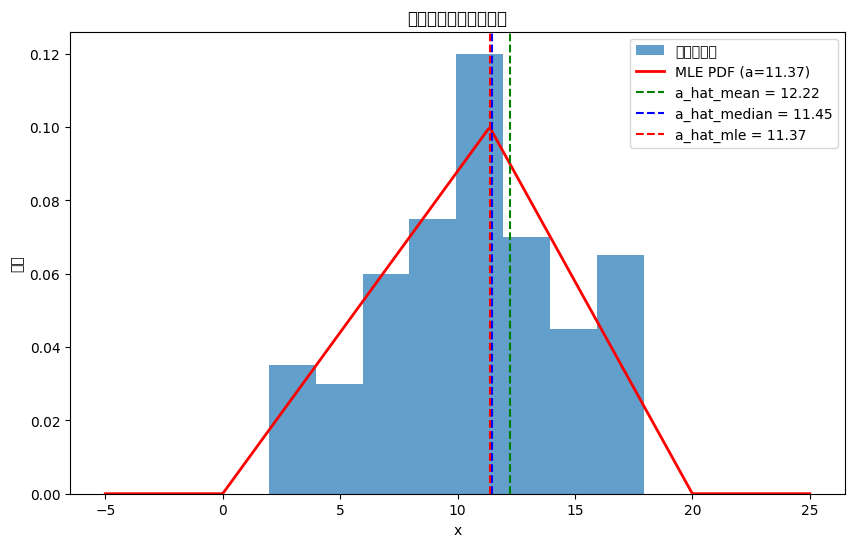

In [9]:
# 找到 ll_vals 中最大值的索引
max_ll_index = np.argmax(ll_vals)

# 找到对应的 a 值
a_hat_mle = a_vals[max_ll_index]

print(f"最大似然估计 (a_hat_mle): {a_hat_mle:.4f}")

# 我们可以将所有三个估计值绘制在直方图上
plt.figure(figsize=(10, 6))
plt.hist(data, bins='auto', density=True, alpha=0.7, label='数据直方图')

# 绘制估计的 PDF
plt.plot(x_vals, pdf(x_vals, a_hat_mle, B_KNOWN), 'r-', lw=2, label=f'MLE PDF (a={a_hat_mle:.2f})')
plt.axvline(a_hat_mean, color='g', linestyle='--', label=f'a_hat_mean = {a_hat_mean:.2f}')
plt.axvline(a_hat_median, color='b', linestyle='--', label=f'a_hat_median = {a_hat_median:.2f}')
plt.axvline(a_hat_mle, color='r', linestyle='--', label=f'a_hat_mle = {a_hat_mle:.2f}')

plt.title('数据直方图与三种估计')
plt.xlabel('x')
plt.ylabel('密度')
plt.legend()
plt.show()

- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

In [10]:
n_bootstraps = 5000
boot_a_mean = []
boot_a_median = []
boot_a_mle = []

n = len(data)
# 预先计算 k/n * b，用于 MLE
k_vals_b_over_n = (np.arange(1, n + 1) / n) * B_KNOWN

print(f"开始 {n_bootstraps} 次 Bootstrap 迭代... (这可能需要 10-30 秒)")

for i in range(n_bootstraps):
    # 1. 生成 bootstrap 样本
    resample = np.random.choice(data, size=n, replace=True)

    # 2. 计算估计量
    # 均值估计
    x_bar_boot = np.mean(resample)
    boot_a_mean.append(est_a_mean(x_bar_boot, b=B_KNOWN))

    # 中位数估计
    m_bar_boot = np.median(resample)
    boot_a_median.append(est_a_median(m_bar_boot, b=B_KNOWN))

    # MLE 估计 (快速版本)
    resample_sorted = np.sort(resample)
    # 找到最小化 |x_k - b*k/n| 的 k
    best_k_idx = np.argmin(np.abs(resample_sorted - k_vals_b_over_n))
    a_mle_boot = resample_sorted[best_k_idx]
    boot_a_mle.append(a_mle_boot)

print("Bootstrap 完成！")

# 4. 计算置信区间
ci_mean = np.percentile(boot_a_mean, [2.5, 97.5])
ci_median = np.percentile(boot_a_median, [2.5, 97.5])
ci_mle = np.percentile(boot_a_mle, [2.5, 97.5])

print(f"--- 95% 置信区间 ---")
print(f"a_hat_mean:   {a_hat_mean:.4f}, CI: [{ci_mean[0]:.4f}, {ci_mean[1]:.4f}]")
print(f"a_hat_median: {a_hat_median:.4f}, CI: [{ci_median[0]:.4f}, {ci_median[1]:.4f}]")
print(f"a_hat_mle:    {a_hat_mle:.4f}, CI: [{ci_mle[0]:.4f}, {ci_mle[1]:.4f}]")

开始 5000 次 Bootstrap 迭代... (这可能需要 10-30 秒)
Bootstrap 完成！
--- 95% 置信区间 ---
a_hat_mean:   12.2193, CI: [9.8773, 14.5916]
a_hat_median: 11.4501, CI: [10.0513, 13.2880]
a_hat_mle:    11.3676, CI: [9.8570, 13.9737]


 - **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.


- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

In [11]:
# b=20
# a_vals 和 ll_vals 来自 Q11
# 1. 计算对数后验
# log p(a) = -0.5 * log(a) - 0.5 * log(b-a)
log_prior_vals = -0.5 * np.log(a_vals) - 0.5 * np.log(B_KNOWN - a_vals)
log_posterior_vals = ll_vals + log_prior_vals

# 2. 找到后验众数 (MAP 估计)
a_hat_jeff = a_vals[np.argmax(log_posterior_vals)]

print(f"Jeffreys 后验估计 (a_hat_jeff): {a_hat_jeff:.4f}")

# 3. 计算可信区间
# 3.1 将对数后验转换为后验 PDF（进行归一化）
#     通过减去最大值来避免 exp(大数) 溢出
posterior_pdf_unnorm = np.exp(log_posterior_vals - np.max(log_posterior_vals))
#     使用梯形法则 (trapz) 进行数值积分来归一化
area = np.trapz(posterior_pdf_unnorm, a_vals)
posterior_pdf = posterior_pdf_unnorm / area

# 3.2 计算后验 CDF (累积积分)
posterior_cdf = cumtrapz(posterior_pdf, a_vals, initial=0)
posterior_cdf = posterior_cdf / posterior_cdf[-1] # 确保 CDF 最终为 1

# 3.3 反转 CDF (使用插值)
inv_cdf_func = interp1d(posterior_cdf, a_vals)
ci_jeff_low = inv_cdf_func(0.025)
ci_jeff_high = inv_cdf_func(0.975)

print(f"Jeffreys 95% 可信区间: [{ci_jeff_low:.4f}, {ci_jeff_high:.4f}]")

# 4. 绘图比较
plt.figure(figsize=(12, 7))
plt.plot(a_vals, posterior_pdf, 'b-', label='Jeffreys Posterior PDF')
plt.axvline(a_hat_jeff, color='b', linestyle='--', label=f'a_hat_jeff = {a_hat_jeff:.2f}')
plt.fill_between(a_vals, posterior_pdf,
                 where=(a_vals >= ci_jeff_low) & (a_vals <= ci_jeff_high),
                 color='blue', alpha=0.2, label='95% Credible Interval')
plt.title('Jeffreys 后验分布 (b=20)')
plt.xlabel('参数 a')
plt.ylabel('后验概率密度')
plt.legend()
plt.grid(True)
plt.show()

Jeffreys 后验估计 (a_hat_jeff): 11.3676


/tmp/ipython-input-2018783266.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(posterior_pdf_unnorm, a_vals)


NameError: name 'cumtrapz' is not defined

All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?